In [35]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.9.1'

In [3]:
# 常量加法


In [9]:
a = tf.constant([2,4])
b = tf.constant([1,3])
sum = a+b
sum

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 7])>

In [10]:
# 取numpy数据
sum.numpy()

array([3, 7])

In [11]:
# 平均值
tf.reduce_mean(a)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [13]:
# 平方
tf.square(sum)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 49])>

In [14]:
# 定义ts变量
va = tf.Variable(2.0)
va


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [20]:
va.numpy()


2.0

In [27]:
# 读取数据
data = pd.read_csv('./data/line_fit_data.csv').values
data

array([[8.52103122e-01, 6.13025781e+00],
       [6.30921990e-01, 5.57730497e+00],
       [8.53299258e-01, 6.13324814e+00],
       [6.56236484e-01, 5.64059121e+00],
       [7.00692015e-01, 5.75173004e+00],
       [9.43773437e-01, 6.35943359e+00],
       [1.30301994e-01, 4.32575498e+00],
       [6.60397464e-01, 5.65099366e+00],
       [3.92256083e-01, 4.98064021e+00],
       [7.73032381e-01, 5.93258095e+00],
       [6.99374164e-01, 5.74843541e+00],
       [3.35502848e-01, 4.83875712e+00],
       [7.77742696e-01, 5.94435674e+00],
       [1.30547337e-01, 4.32636834e+00],
       [2.53731843e-01, 4.63432961e+00],
       [7.95165003e-01, 5.98791251e+00],
       [7.65909629e-01, 5.91477407e+00],
       [7.87853443e-01, 5.96963361e+00],
       [6.91226057e-02, 4.17280651e+00],
       [1.75783177e-01, 4.43945794e+00],
       [7.41750553e-01, 5.85437638e+00],
       [8.63630010e-01, 6.15907502e+00],
       [5.64934594e-01, 5.41233648e+00],
       [3.73987604e-01, 4.93496901e+00],
       [9.705731

In [28]:
x = data[:,0]
x

array([0.85210312, 0.63092199, 0.85329926, 0.65623648, 0.70069201,
       0.94377344, 0.13030199, 0.66039746, 0.39225608, 0.77303238,
       0.69937416, 0.33550285, 0.7777427 , 0.13054734, 0.25373184,
       0.795165  , 0.76590963, 0.78785344, 0.06912261, 0.17578318,
       0.74175055, 0.86363001, 0.56493459, 0.3739876 , 0.9705732 ,
       0.56662658, 0.10267778, 0.27071154, 0.91246366, 0.95468549,
       0.70191882, 0.75390907, 0.58137141, 0.69044566, 0.14515973,
       0.27402253, 0.56857987, 0.39709157, 0.79084246, 0.4980397 ,
       0.35126054, 0.30567979, 0.28243623, 0.64352277, 0.19340263,
       0.1886362 , 0.67574954, 0.06302231, 0.29229232, 0.56235453,
       0.71580687, 0.66682795, 0.07317184, 0.65477297, 0.3565308 ,
       0.21386369, 0.15789184, 0.46075351, 0.60530384, 0.07608602,
       0.29653685, 0.66776577, 0.51759454, 0.62042524, 0.19734839,
       0.58648911, 0.47088009, 0.18806616, 0.45323689, 0.68014594,
       0.00444759, 0.76139349, 0.04131049, 0.55538359, 0.82109

In [32]:
target_y = data[:,1]
target_y

array([6.13025781, 5.57730497, 6.13324814, 5.64059121, 5.75173004,
       6.35943359, 4.32575498, 5.65099366, 4.98064021, 5.93258095,
       5.74843541, 4.83875712, 5.94435674, 4.32636834, 4.63432961,
       5.98791251, 5.91477407, 5.96963361, 4.17280651, 4.43945794,
       5.85437638, 6.15907502, 5.41233648, 4.93496901, 6.42643299,
       5.41656644, 4.25669446, 4.67677886, 6.28115914, 6.38671374,
       5.75479706, 5.88477266, 5.45342851, 5.72611414, 4.36289932,
       4.68505633, 5.42144966, 4.99272891, 5.97710614, 5.24509925,
       4.87815136, 4.76419947, 4.70609058, 5.60880693, 4.48350656,
       4.4715905 , 5.68937386, 4.15755577, 4.73073079, 5.40588633,
       5.78951718, 5.66706988, 4.18292959, 5.63693242, 4.89132701,
       4.53465923, 4.39472961, 5.15188378, 5.5132596 , 4.19021504,
       4.74134213, 5.66941443, 5.29398635, 5.55106309, 4.49337098,
       5.46622277, 5.17720021, 4.47016539, 5.13309222, 5.70036485,
       4.01111896, 5.90348374, 4.10327624, 5.38845899, 6.05273

In [39]:
# 构建线性模型 y=wx+b
w = tf.Variable(0.2)
b = tf.Variable(0.2)
predicted_y = w*x + b
predicted_y

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.37042063, 0.3261844 , 0.37065986, 0.3312473 , 0.3401384 ,
       0.3887547 , 0.2260604 , 0.3320795 , 0.2784512 , 0.35460648,
       0.33987483, 0.26710057, 0.35554856, 0.22610947, 0.25074637,
       0.359033  , 0.35318193, 0.3575707 , 0.21382453, 0.23515664,
       0.3483501 , 0.37272602, 0.3129869 , 0.27479753, 0.39411464,
       0.31332532, 0.22053556, 0.2541423 , 0.38249272, 0.3909371 ,
       0.34038377, 0.3507818 , 0.3162743 , 0.33808914, 0.22903195,
       0.2548045 , 0.31371596, 0.27941832, 0.35816848, 0.29960793,
       0.2702521 , 0.26113597, 0.25648725, 0.32870457, 0.23868053,
       0.23772724, 0.3351499 , 0.21260446, 0.25845847, 0.3124709 ,
       0.34316137, 0.33336562, 0.21463437, 0.3309546 , 0.27130616,
       0.24277274, 0.23157838, 0.2921507 , 0.32106078, 0.2152172 ,
       0.25930738, 0.33355317, 0.3035189 , 0.32408506, 0.23946968,
       0.31729782, 0.294176  , 0.23761323, 0.2906474 , 0.33602917,
       0.20088

In [40]:
def model(x,w,b):
    return w*x + b

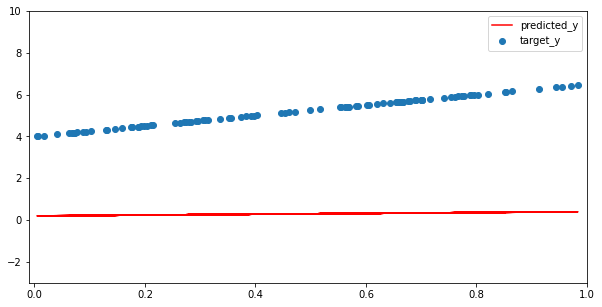

In [43]:
plt.figure(figsize=(10,5))
plt.axis([-0.01,1,-3,10])
plt.scatter(x,target_y)
plt.plot(x,model(x,w,b).numpy(),color = 'red')
plt.legend(['predicted_y','target_y'])

In [46]:
# 构建损失函数

def loss(predicted_y, target_y):   # 构造损失函数
    return tf.reduce_mean(tf.square(predicted_y-target_y))

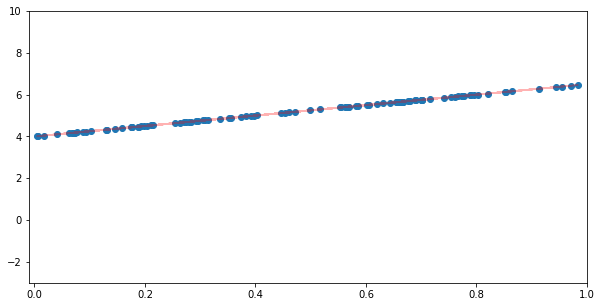

第 0  轮训练的损失值： 2.8325173e-08 w= 2.4993894 b= 4.000304


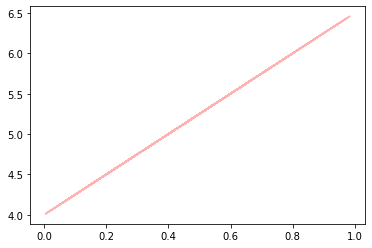

第 1  轮训练的损失值： 2.4980611e-08 w= 2.4994266 b= 4.0002856


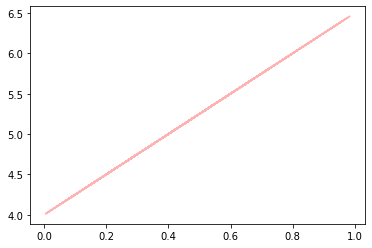

第 2  轮训练的损失值： 2.2037048e-08 w= 2.4994614 b= 4.0002685


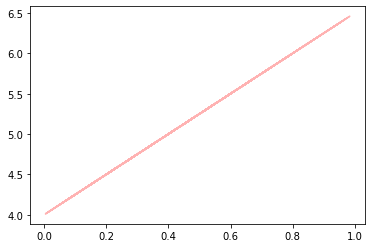

第 3  轮训练的损失值： 1.9435365e-08 w= 2.499494 b= 4.000252


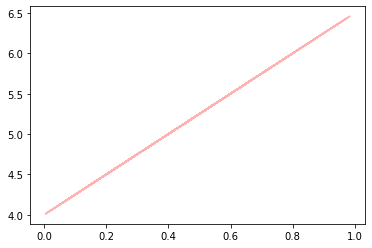

第 4  轮训练的损失值： 1.7138072e-08 w= 2.499525 b= 4.0002365


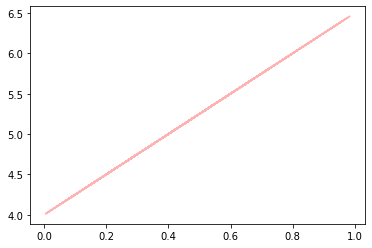

第 5  轮训练的损失值： 1.511386e-08 w= 2.499554 b= 4.000222


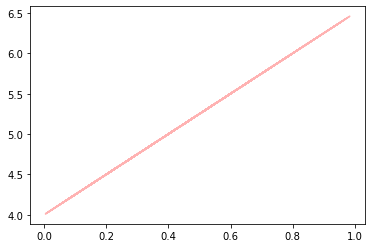

第 6  轮训练的损失值： 1.33358204e-08 w= 2.499581 b= 4.000209


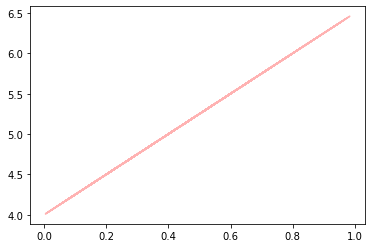

第 7  轮训练的损失值： 1.1755137e-08 w= 2.4996066 b= 4.000196


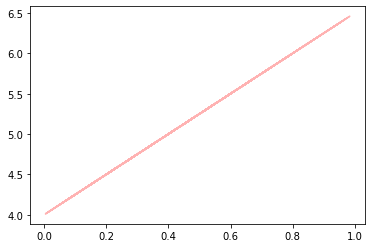

第 8  轮训练的损失值： 1.0376489e-08 w= 2.4996305 b= 4.000184


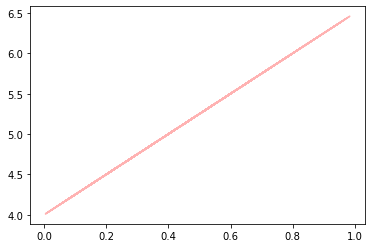

第 9  轮训练的损失值： 9.149317e-09 w= 2.499653 b= 4.000173


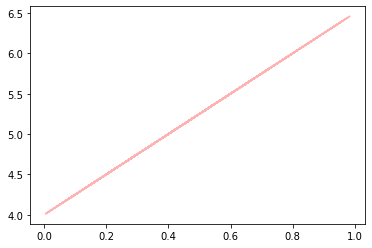

第 10  轮训练的损失值： 8.0653395e-09 w= 2.499674 b= 4.000162


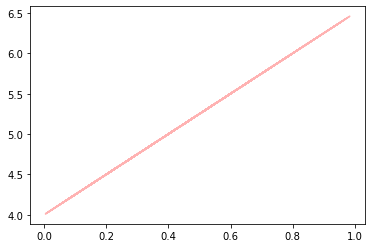

第 11  轮训练的损失值： 7.1100796e-09 w= 2.499694 b= 4.0001526


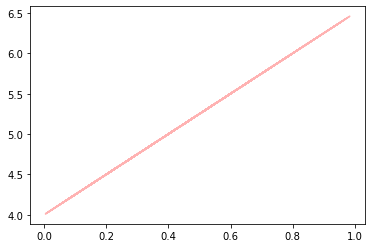

第 12  轮训练的损失值： 6.2691403e-09 w= 2.4997127 b= 4.000143


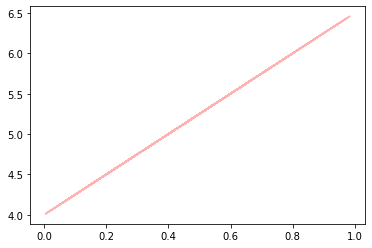

第 13  轮训练的损失值： 5.5245253e-09 w= 2.4997303 b= 4.0001345


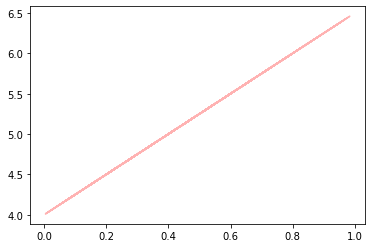

第 14  轮训练的损失值： 4.8749187e-09 w= 2.4997468 b= 4.0001264


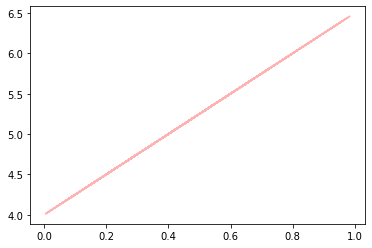

第 15  轮训练的损失值： 4.296819e-09 w= 2.499762 b= 4.0001183


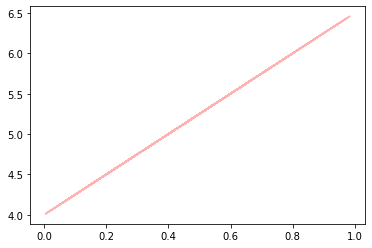

第 16  轮训练的损失值： 3.7872474e-09 w= 2.4997766 b= 4.000111


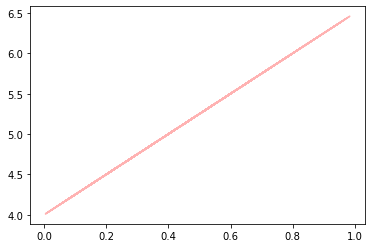

第 17  轮训练的损失值： 3.3421224e-09 w= 2.4997902 b= 4.0001044


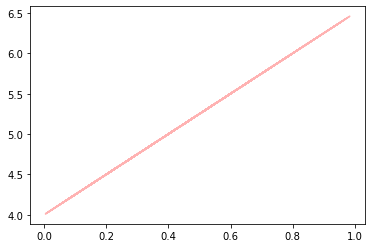

第 18  轮训练的损失值： 2.948434e-09 w= 2.499803 b= 4.000098


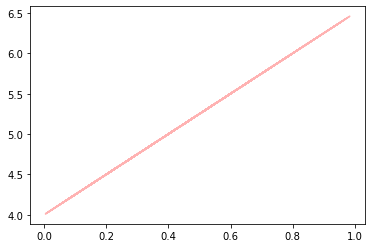

第 19  轮训练的损失值： 2.5994655e-09 w= 2.499815 b= 4.000092


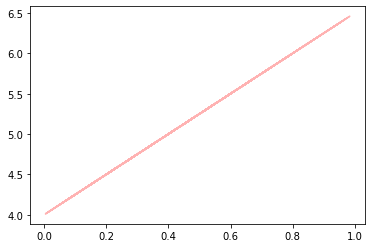

第 20  轮训练的损失值： 2.2904145e-09 w= 2.4998264 b= 4.000087


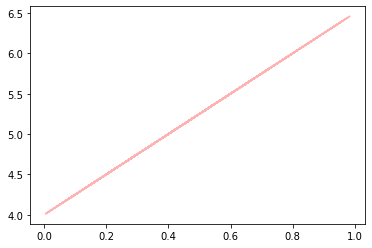

第 21  轮训练的损失值： 2.0157678e-09 w= 2.499837 b= 4.000081


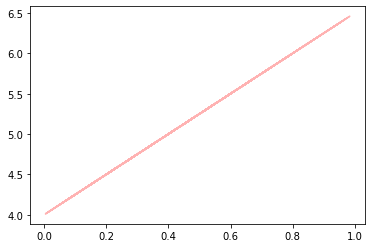

第 22  轮训练的损失值： 1.7793127e-09 w= 2.499847 b= 4.0000763


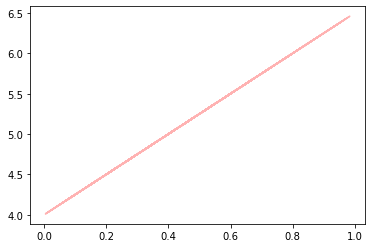

第 23  轮训练的损失值： 1.5670321e-09 w= 2.4998562 b= 4.0000715


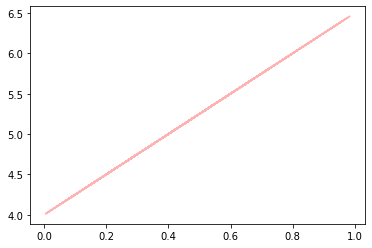

第 24  轮训练的损失值： 1.382341e-09 w= 2.499865 b= 4.000067


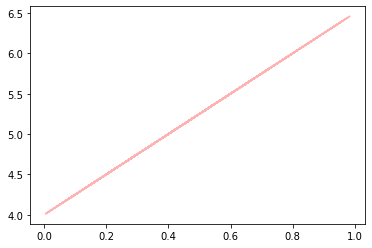

第 25  轮训练的损失值： 1.2204145e-09 w= 2.4998732 b= 4.000063


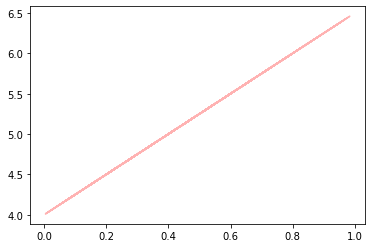

第 26  轮训练的损失值： 1.0752024e-09 w= 2.499881 b= 4.000059


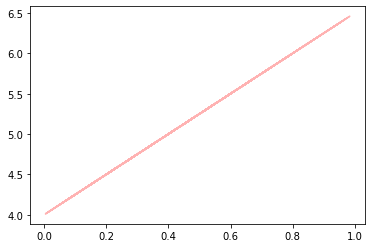

第 27  轮训练的损失值： 9.472046e-10 w= 2.4998884 b= 4.000056


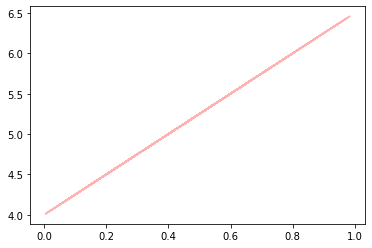

第 28  轮训练的损失值： 8.359848e-10 w= 2.499895 b= 4.0000525


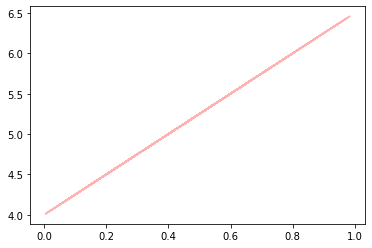

第 29  轮训练的损失值： 7.3900536e-10 w= 2.4999013 b= 4.000049


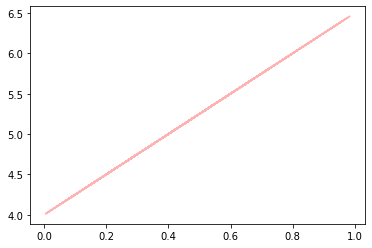

第 30  轮训练的损失值： 6.535697e-10 w= 2.4999073 b= 4.0000463


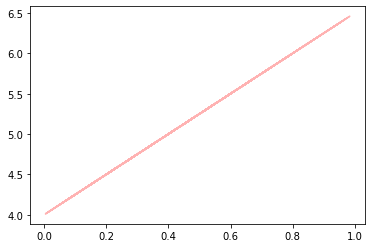

第 31  轮训练的损失值： 5.7550326e-10 w= 2.499913 b= 4.0000434


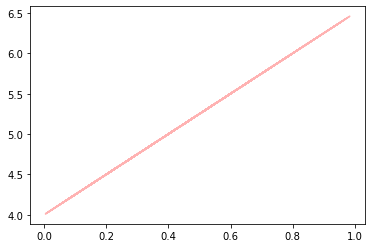

第 32  轮训练的损失值： 5.0699783e-10 w= 2.4999182 b= 4.0000405


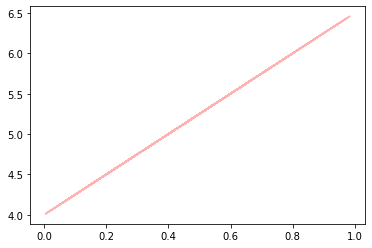

第 33  轮训练的损失值： 4.4766466e-10 w= 2.4999232 b= 4.000038


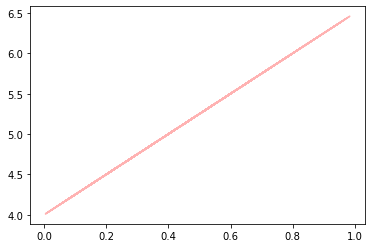

第 34  轮训练的损失值： 3.9337011e-10 w= 2.499928 b= 4.000036


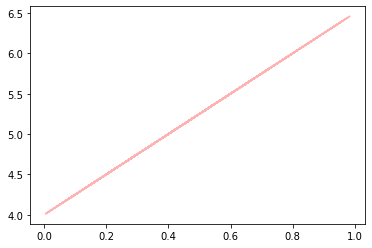

第 35  轮训练的损失值： 3.4662662e-10 w= 2.4999325 b= 4.000034


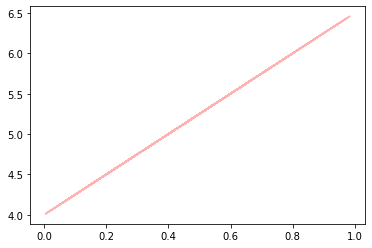

第 36  轮训练的损失值： 3.0563796e-10 w= 2.4999366 b= 4.0000315


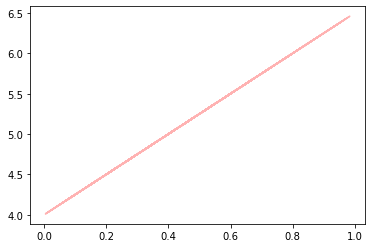

第 37  轮训练的损失值： 2.6969474e-10 w= 2.4999404 b= 4.0000296


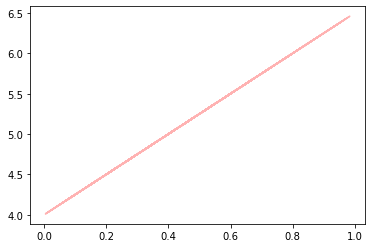

第 38  轮训练的损失值： 2.3716665e-10 w= 2.4999442 b= 4.000028


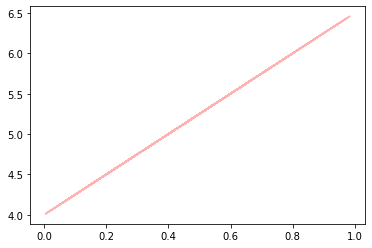

第 39  轮训练的损失值： 2.0816969e-10 w= 2.4999475 b= 4.000026


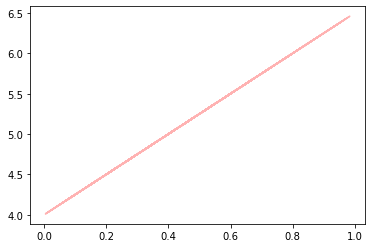

第 40  轮训练的损失值： 1.8570973e-10 w= 2.4999506 b= 4.000025


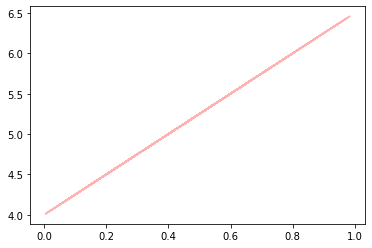

第 41  轮训练的损失值： 1.6366584e-10 w= 2.4999535 b= 4.000023


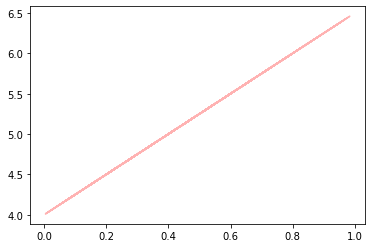

第 42  轮训练的损失值： 1.4515081e-10 w= 2.4999564 b= 4.000022


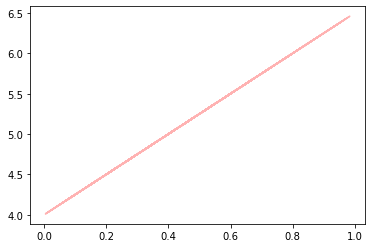

第 43  轮训练的损失值： 1.2825922e-10 w= 2.499959 b= 4.0000205


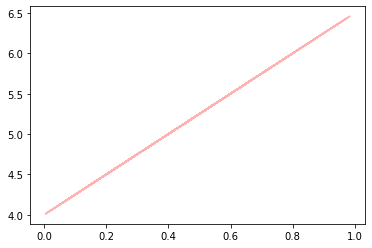

第 44  轮训练的损失值： 1.1280008e-10 w= 2.4999614 b= 4.000019


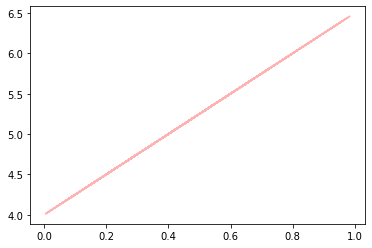

第 45  轮训练的损失值： 1.004355e-10 w= 2.4999638 b= 4.000018


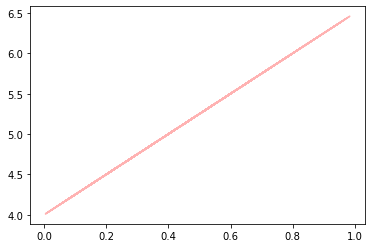

第 46  轮训练的损失值： 8.878942e-11 w= 2.499966 b= 4.000017


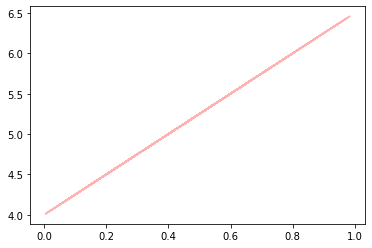

第 47  轮训练的损失值： 7.837571e-11 w= 2.4999678 b= 4.0000157


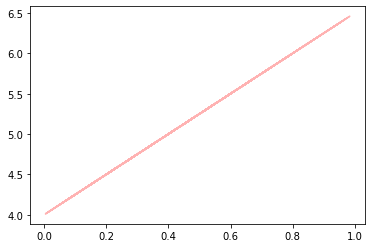

第 48  轮训练的损失值： 6.9398993e-11 w= 2.49997 b= 4.0000153


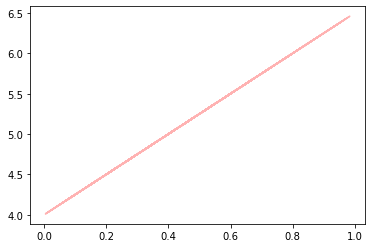

第 49  轮训练的损失值： 6.110213e-11 w= 2.4999716 b= 4.0000143


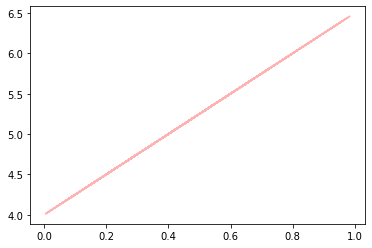

第 50  轮训练的损失值： 5.4481007e-11 w= 2.4999733 b= 4.0000134


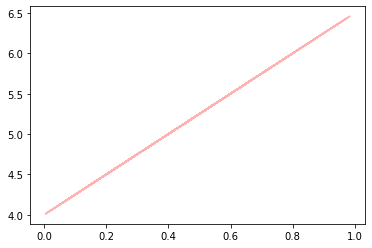

第 51  轮训练的损失值： 4.7148205e-11 w= 2.499975 b= 4.0000124


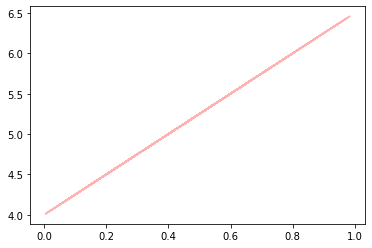

第 52  轮训练的损失值： 4.1848126e-11 w= 2.4999766 b= 4.000012


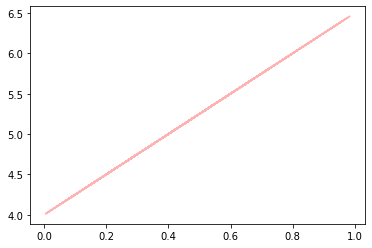

第 53  轮训练的损失值： 3.7387052e-11 w= 2.4999778 b= 4.000011


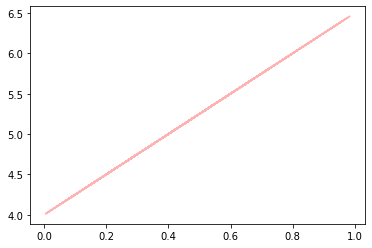

第 54  轮训练的损失值： 3.2903246e-11 w= 2.4999793 b= 4.0000105


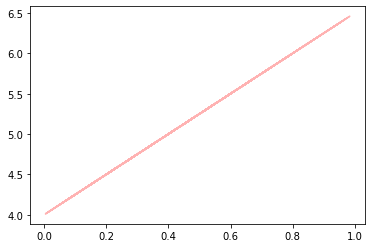

第 55  轮训练的损失值： 2.8810518e-11 w= 2.4999804 b= 4.0000095


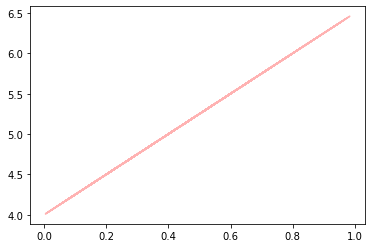

第 56  轮训练的损失值： 2.534989e-11 w= 2.4999816 b= 4.000009


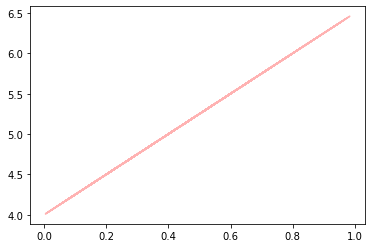

第 57  轮训练的损失值： 2.2250788e-11 w= 2.4999828 b= 4.0000086


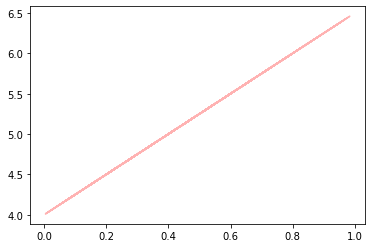

第 58  轮训练的损失值： 2.004981e-11 w= 2.4999838 b= 4.000008


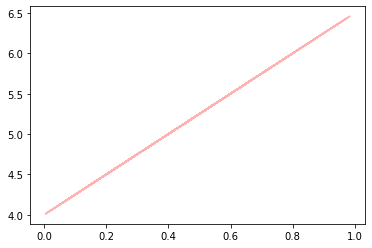

第 59  轮训练的损失值： 1.7753337e-11 w= 2.4999847 b= 4.0000076


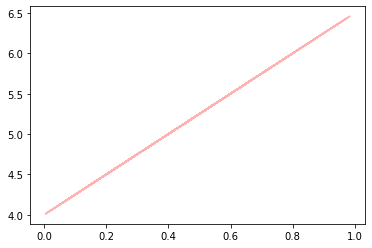

第 60  轮训练的损失值： 1.5556906e-11 w= 2.4999857 b= 4.000007


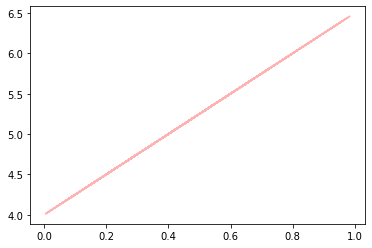

第 61  轮训练的损失值： 1.3612862e-11 w= 2.4999866 b= 4.0000067


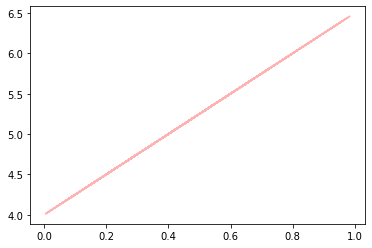

第 62  轮训练的损失值： 1.2100827e-11 w= 2.4999874 b= 4.000006


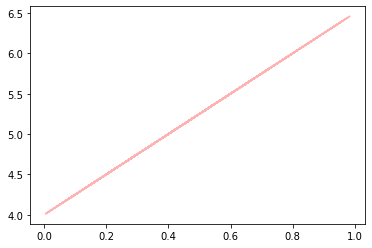

第 63  轮训练的损失值： 1.064791e-11 w= 2.499988 b= 4.0000057


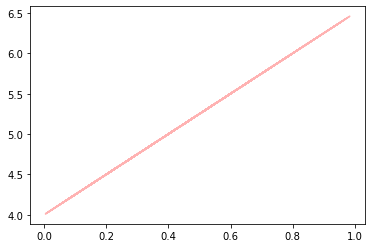

第 64  轮训练的损失值： 9.547421e-12 w= 2.499989 b= 4.0000057


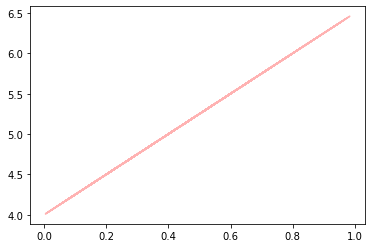

第 65  轮训练的损失值： 8.471943e-12 w= 2.4999895 b= 4.0000052


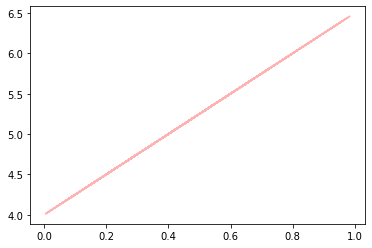

第 66  轮训练的损失值： 7.080416e-12 w= 2.4999902 b= 4.000005


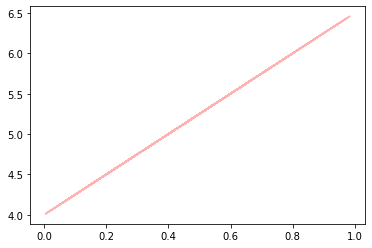

第 67  轮训练的损失值： 6.4551385e-12 w= 2.499991 b= 4.000005


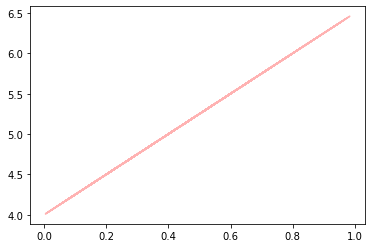

第 68  轮训练的损失值： 5.4819795e-12 w= 2.4999914 b= 4.0000043


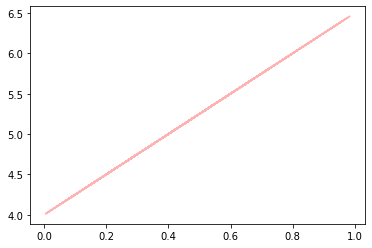

第 69  轮训练的损失值： 4.956746e-12 w= 2.499992 b= 4.000004


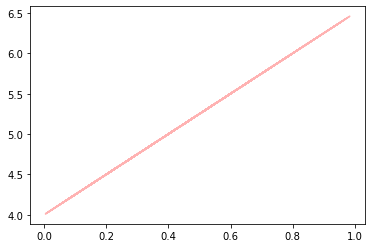

第 70  轮训练的损失值： 4.2132344e-12 w= 2.4999926 b= 4.000004


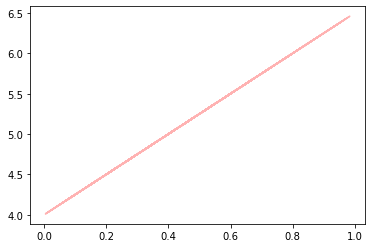

第 71  轮训练的损失值： 3.66299e-12 w= 2.499993 b= 4.0000033


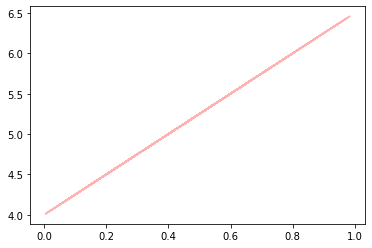

第 72  轮训练的损失值： 3.1809577e-12 w= 2.4999936 b= 4.0000033


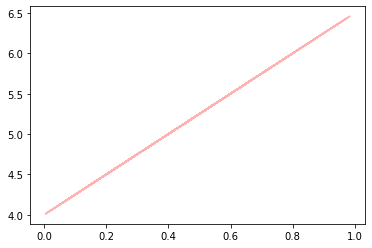

第 73  轮训练的损失值： 2.9331203e-12 w= 2.4999938 b= 4.000003


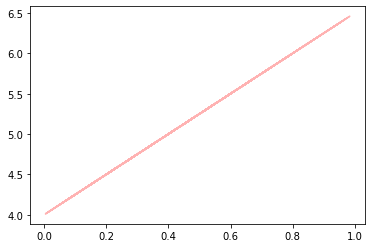

第 74  轮训练的损失值： 2.4510882e-12 w= 2.4999943 b= 4.000003


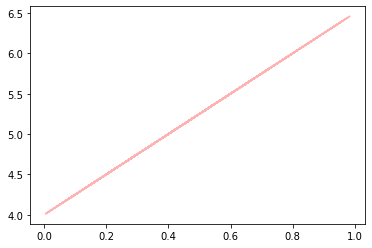

第 75  轮训练的损失值： 2.3555912e-12 w= 2.4999945 b= 4.000003


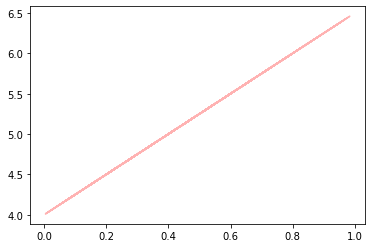

第 76  轮训练的损失值： 2.0850166e-12 w= 2.4999948 b= 4.0000024


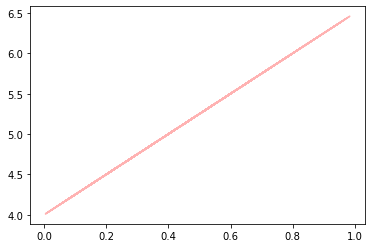

第 77  轮训练的损失值： 1.7394086e-12 w= 2.4999952 b= 4.0000024


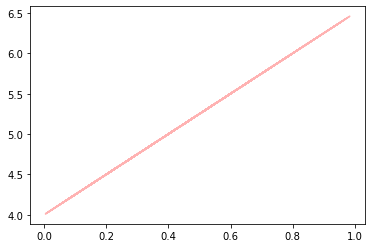

第 78  轮训练的损失值： 1.7007551e-12 w= 2.4999955 b= 4.0000024


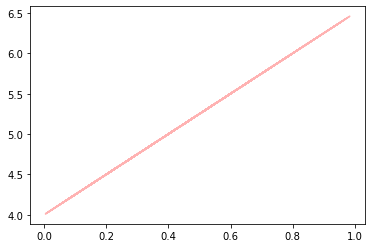

第 79  轮训练的损失值： 1.4551915e-12 w= 2.4999957 b= 4.000002


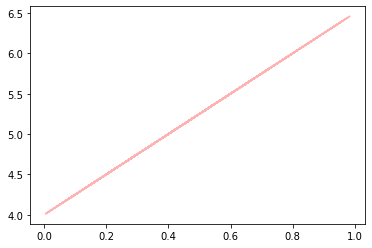

第 80  轮训练的损失值： 1.0891199e-12 w= 2.4999962 b= 4.000002


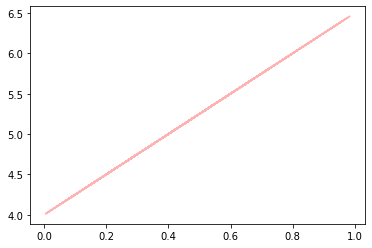

第 81  轮训练的损失值： 1.0390977e-12 w= 2.4999964 b= 4.000002


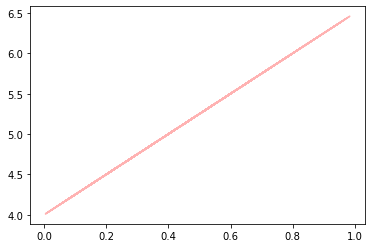

第 82  轮训练的损失值： 9.913493e-13 w= 2.4999967 b= 4.000002


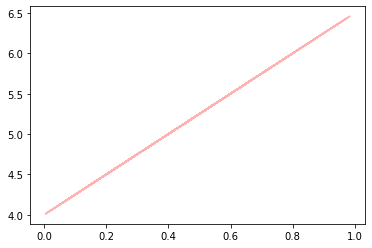

第 83  轮训练的损失值： 8.731149e-13 w= 2.4999967 b= 4.0000014


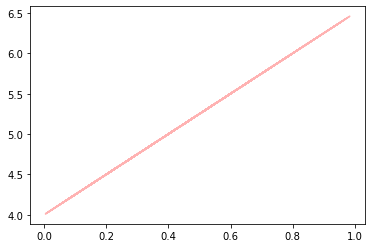

第 84  轮训练的损失值： 7.366907e-13 w= 2.499997 b= 4.0000014


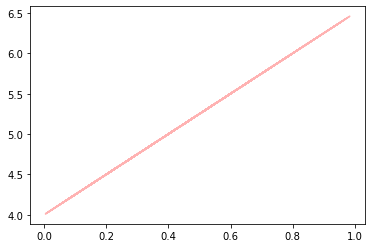

第 85  轮训练的损失值： 6.616574e-13 w= 2.4999971 b= 4.0000014


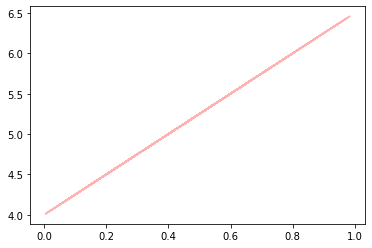

第 86  轮训练的损失值： 6.0708773e-13 w= 2.4999974 b= 4.0000014


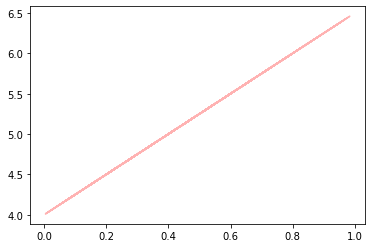

第 87  轮训练的损失值： 5.570655e-13 w= 2.4999976 b= 4.0000014


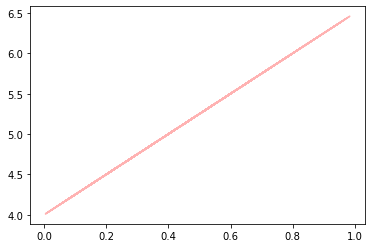

第 88  轮训练的损失值： 4.9112716e-13 w= 2.4999976 b= 4.000001


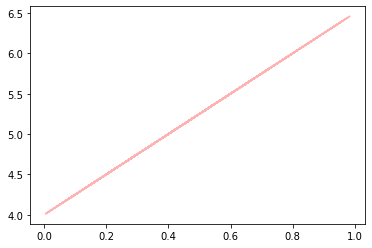

第 89  轮训练的损失值： 3.9108273e-13 w= 2.4999979 b= 4.000001


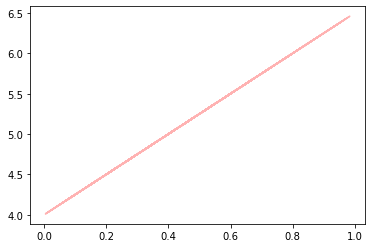

第 90  轮训练的损失值： 3.1150194e-13 w= 2.499998 b= 4.000001


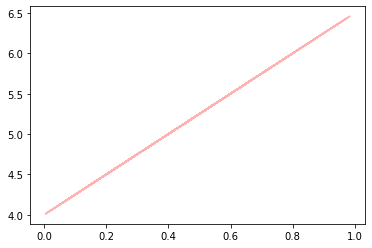

第 91  轮训练的损失值： 2.4556358e-13 w= 2.4999983 b= 4.000001


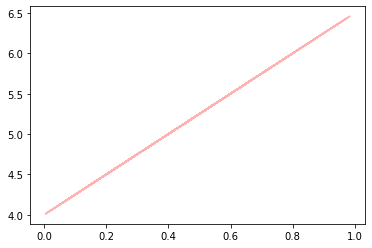

第 92  轮训练的损失值： 2.4556358e-13 w= 2.4999983 b= 4.000001


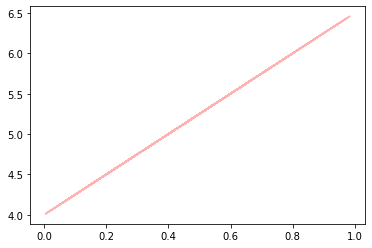

第 93  轮训练的损失值： 2.4556358e-13 w= 2.4999983 b= 4.000001


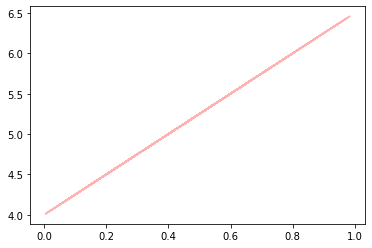

第 94  轮训练的损失值： 2.4556358e-13 w= 2.4999983 b= 4.000001


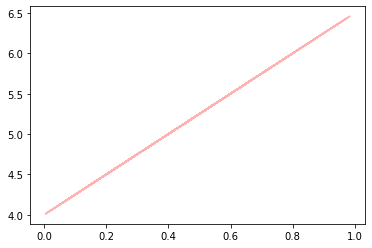

第 95  轮训练的损失值： 2.4556358e-13 w= 2.4999983 b= 4.000001


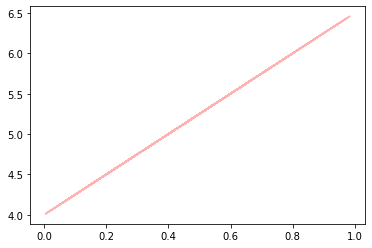

第 96  轮训练的损失值： 2.4556358e-13 w= 2.4999983 b= 4.000001


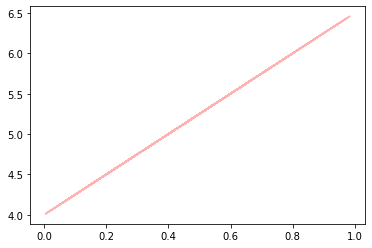

第 97  轮训练的损失值： 2.4556358e-13 w= 2.4999983 b= 4.000001


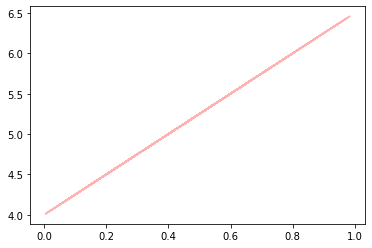

第 98  轮训练的损失值： 2.4556358e-13 w= 2.4999983 b= 4.000001


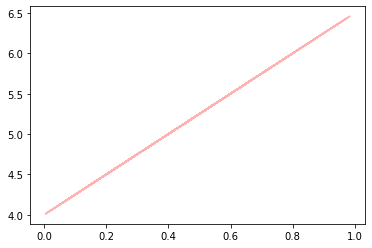

第 99  轮训练的损失值： 2.4556358e-13 w= 2.4999983 b= 4.000001


In [47]:
plt.figure(figsize=(10, 5))
plt.axis([-0.01, 1, -3, 10])
plt.scatter(x, target_y)
learning_rate = 0.5  # 学习速率
# 最小化方差（训练）
for i in range(100):
    plt.plot(x, model(x, w, b).numpy(), color='red', alpha=0.3)
    plt.pause(0.2)
    print('第', i, ' 轮训练的损失值：', loss(model(x, w, b), target_y).numpy(), 'w=', w.numpy(), 'b=', b.numpy())
    with tf.GradientTape() as t:
        dw, db = t.gradient(loss(model(x, w, b), target_y), [w, b])
    w.assign_sub(learning_rate*dw)  # 更新模型的参数
    b.assign_sub(learning_rate*db)


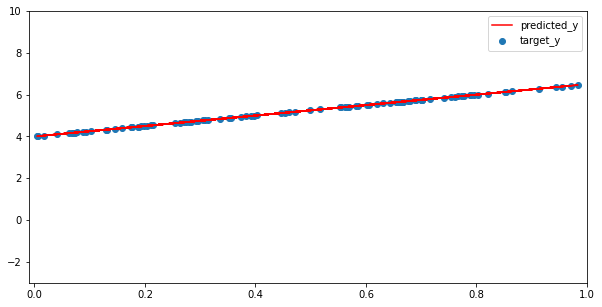

In [48]:
plt.figure(figsize=(10, 5))
plt.axis([-0.01, 1, -3, 10])
plt.scatter(x, target_y)
plt.plot(x, model(x, w, b).numpy(), color='red')
plt.legend(['predicted_y', 'target_y'])


In [50]:
#卷积操作


In [53]:
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt